In [27]:
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [28]:

auth = tw.OAuthHandler("jwc6IYlv3HEfIzcRhu4K7GUT1", "AWD0d3aRKt3HHfAPe3oV8xnq2MIvL1zFlWX0Sa0Xm1g6hmjdZX")
auth.set_access_token("1335153296365875201-KGvNr9iJNqjITaz0lBL2STQfnMhqnT", "hpUawKvoOgKcDNzZ1ToDFrs4wbBWoFJveOintgGzrUx7e")


api = tw.API(auth)


In [29]:
hashtag = "#IndiavsPakistan"
query = tw.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImRo45 Hero of 2011 Worldcup ❤🙏\n\n#INDvPAK #CWC19 #IndiaVsPakistan', 'Timestamp': datetime.datetime(2022, 5, 10, 10, 20, 7, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImRo45 Hero of 2011 Worldcup ❤🙏\n\n#INDvPAK #CWC19 #IndiaVsPakistan', 'Timestamp': datetime.datetime(2022, 5, 10, 8, 20, 3, tzinfo=datetime.timezone.utc)}, {'Tweet': '#Pakistan vs #India \n Do u remember this moment...\nI will never forget this ....\n❤️❤️\n#CricketTwitter #cricket22… https://t.co/dPz3LnEdFD', 'Timestamp': datetime.datetime(2022, 5, 9, 9, 31, 21, tzinfo=datetime.timezone.utc)}, {'Tweet': "RT @RTQE11347447: Pakistan's Drone attack on India. #Indian #indiaVsPakistan #upsc #drone #drones https://t.co/SEN7sei1Bi", 'Timestamp': datetime.datetime(2022, 5, 8, 23, 51, 13, tzinfo=datetime.timezone.utc)}, {'Tweet': "Pakistan's Drone attack on India. #Indian #indiaVsPakistan #upsc #drone #drones https://t.co/SEN7s

In [30]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 10:20:07+00:00
1,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 08:20:03+00:00
2,#Pakistan vs #India \n Do u remember this mome...,2022-05-09 09:31:21+00:00
3,RT @RTQE11347447: Pakistan's Drone attack on I...,2022-05-08 23:51:13+00:00
4,Pakistan's Drone attack on India. #Indian #ind...,2022-05-08 08:59:37+00:00


In [32]:

indian_handle = ['India', 'Hisdustan', 'indian country', 'India\'s']
pakistan_handle = ['Pakistan', 'Islam', 'pakistan country',  'Pakistan\'s']

In [33]:

def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['india'] = df['Tweet'].apply(lambda x: identify_subject(x, indian_handle)) 
df['pakistan'] = df['Tweet'].apply(lambda x: identify_subject(x, pakistan_handle))
df.head(10)

,Tweet,Timestamp,india,pakistan
0,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 10:20:07+00:00,1,1
1,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 08:20:03+00:00,1,1
2,#Pakistan vs #India \n Do u remember this mome...,2022-05-09 09:31:21+00:00,1,1
3,RT @RTQE11347447: Pakistan's Drone attack on I...,2022-05-08 23:51:13+00:00,1,1
4,Pakistan's Drone attack on India. #Indian #ind...,2022-05-08 08:59:37+00:00,1,1
5,RT @SahibSaleemPti: ٹی ٹوئنٹی ورلڈکپ کے سب سے ...,2022-05-07 21:40:23+00:00,1,1
6,#indiavspakistan #GodiMedia https://t.co/NDqIG...,2022-05-07 16:09:44+00:00,0,0
7,India vs. Pakistan T20 #indiancricketteam #pak...,2022-05-07 15:53:42+00:00,1,1
8,#YuvrajSingh ने 18 साल पुराने उस ऐतिहासिक मु...,2022-05-06 17:02:04+00:00,0,0
9,Which one is more Powerful??\nIndia 🇮🇳 vs Paki...,2022-05-05 06:18:02+00:00,1,1


In [34]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [36]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#IndiavsPakistan']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagdatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nagdatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in stop_words])
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in custom_stopwords])
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,india,pakistan,Processed Tweet
0,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 10:20:07+00:00,1,1,@CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImR...
1,RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @...,2022-05-10 08:20:03+00:00,1,1,@CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImR...
2,#Pakistan vs #India \n Do u remember this mome...,2022-05-09 09:31:21+00:00,1,1,#Pakistan v #India Do u remember moment... I n...
3,RT @RTQE11347447: Pakistan's Drone attack on I...,2022-05-08 23:51:13+00:00,1,1,@RTQE11347447: Pakistan's Drone attack India. ...
4,Pakistan's Drone attack on India. #Indian #ind...,2022-05-08 08:59:37+00:00,1,1,Pakistan's Drone attack India. #Indian #indiaV...


In [38]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImRo45 Hero of 2011 Worldcup ❤🙏

#INDvPAK #CWC19 #IndiaVsPakistan

------------------------------------

Cleaned and lemmatized review
 @CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImRo45 Hero 2011 Worldcup ❤🙏 #INDvPAK #CWC19 #IndiaVsPakistan


In [39]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'india', 'pakistan', 'polarity', 'subjectivity']].head()

,Processed Tweet,india,pakistan,polarity,subjectivity
0,@CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImR...,1,1,0.0,0.0
1,@CrickeTendulkar: @YUVSTRONG12 @sachin_rt @ImR...,1,1,0.0,0.0
2,#Pakistan v #India Do u remember moment... I n...,1,1,0.0,0.0
3,@RTQE11347447: Pakistan's Drone attack India. ...,1,1,0.0,0.0
4,Pakistan's Drone attack India. #Indian #indiaV...,1,1,0.0,0.0


In [40]:
display(df[df['india']==1][['india','polarity','subjectivity']].groupby('india').agg([np.mean, np.max, np.min, np.median]))
df[df['pakistan']==1][['pakistan','polarity','subjectivity']].groupby('pakistan').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
india                                                         
1      0.052941  0.3  0.0    0.0     0.176471  1.0  0.0    0.0

polarity                  subjectivity                 
              mean amax amin median         mean amax amin median
pakistan                                                         
1         0.047368  0.3  0.0    0.0     0.157895  1.0  0.0    0.0

In [41]:

biden = df[df['pakistan']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['india']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [25]:
biden

,Timestamp,polarity,MA Polarity
20,2022-05-02 16:32:36+00:00,0.0,NaN
19,2022-05-02 16:35:43+00:00,0.0,NaN
18,2022-05-02 23:57:54+00:00,0.0,0.000000
17,2022-05-02 23:58:05+00:00,0.0,0.000000
16,2022-05-02 23:58:20+00:00,0.0,0.000000
15,2022-05-02 23:58:35+00:00,0.0,0.000000
14,2022-05-02 23:58:47+00:00,0.0,0.000000
13,2022-05-02 23:59:04+00:00,0.0,0.000000
12,2022-05-04 10:06:47+00:00,0.3,0.033333
11,2022-05-04 10:15:08+00:00,0.3,0.060000


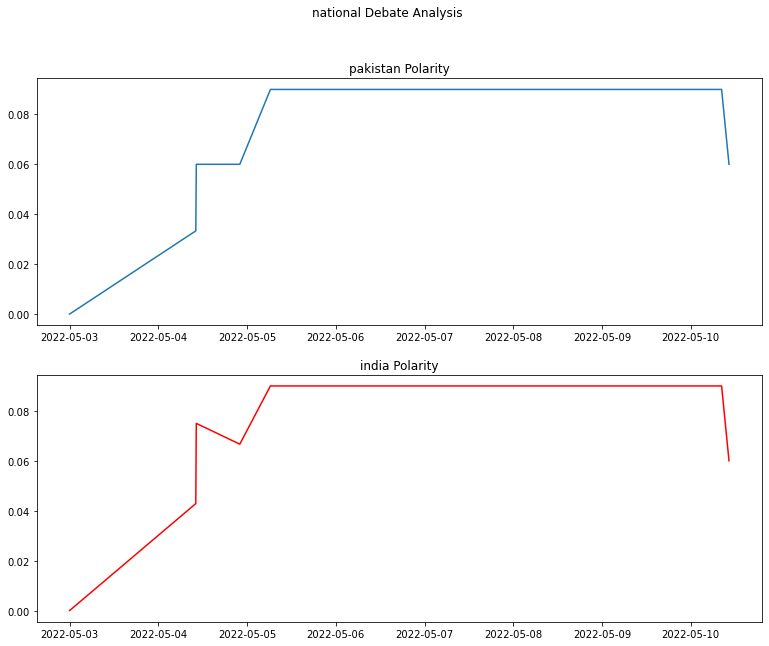

In [42]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["pakistan Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["india Polarity"]))

fig.suptitle("\n".join(["national Debate Analysis"]), y=0.98)

plt.show()